In [63]:
%matplotlib notebook
%precision 3

from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['timezone'] = 'Europe/London'

import pandas

from datetime import datetime

In [64]:
data=pandas.read_csv("output.txt",skipinitialspace=True)
data["datetime"]=pandas.to_datetime(data["Timestamp"], unit='s')
data.set_index("datetime", inplace=True)
data

,Timestamp,LinkStatus,FirmwareVersion,Profile,Upstream,Downstream,SNR1,SNR2
datetime,,,,,,,,
2020-07-11 13:25:18,1594473918,SHOWTIME,05-07-06-0D-01-07,17A,11999,27400,16,17
2020-07-11 13:25:28,1594473928,SHOWTIME,05-07-06-0D-01-07,17A,11999,27400,17,17
2020-07-11 13:25:38,1594473938,SHOWTIME,05-07-06-0D-01-07,17A,11999,27400,16,17
2020-07-11 13:25:48,1594473948,SHOWTIME,05-07-06-0D-01-07,17A,11999,27400,17,17
2020-07-11 13:25:58,1594473958,SHOWTIME,05-07-06-0D-01-07,17A,11999,27400,17,17
...,...,...,...,...,...,...,...,...
2020-07-13 12:43:01,1594644181,SHOWTIME,05-07-06-0D-01-07,17A,9998,24998,17,17
2020-07-13 12:43:11,1594644191,SHOWTIME,05-07-06-0D-01-07,17A,9998,24998,18,17
2020-07-13 12:43:21,1594644201,SHOWTIME,05-07-06-0D-01-07,17A,9998,24998,11,17


<IPython.core.display.Javascript object>


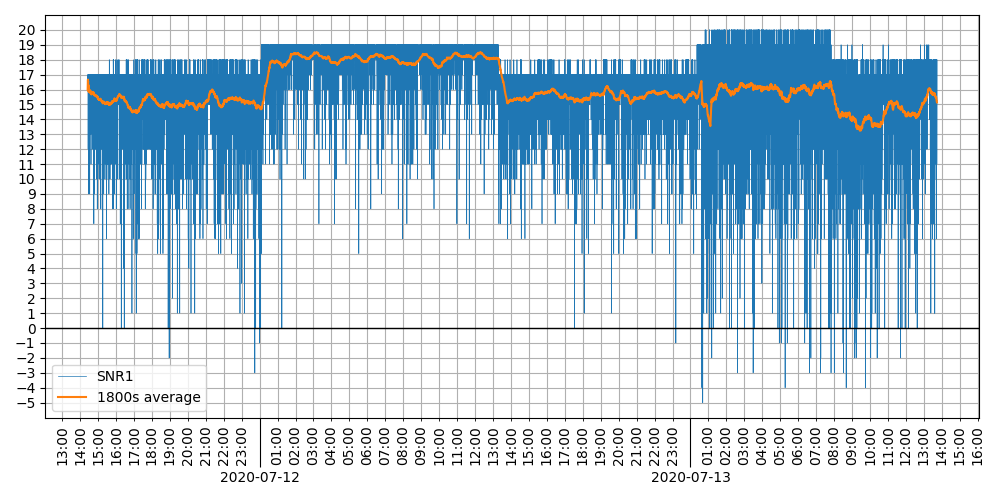

In [65]:
plt.figure()
period = "1800s"
plt.plot(data["SNR1"], label="SNR1", linewidth=0.5)
rolling = data["SNR1"].rolling(period).mean()
plt.plot(rolling, label=period + " average");

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_locator(mdates.HourLocator())
ax.tick_params(axis='x',which='major', length=35)
ax.tick_params(which='minor', rotation=90)
ax.xaxis.grid(True, which='both')

ax.yaxis.set_major_locator(ticker.IndexLocator(1,0));
ax.yaxis.grid(True, which='major')
ax.axhline(0, color='black', lw=1)

ax.set_ylim([-6, 21])
plt.legend()
plt.tight_layout()